 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna().head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
#df = pd.read_csv("Price Data.csv", names=['Date', 'Price'])
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
print(sp500_df.dtypes)
sp500_df.head()

Close    object
dtype: object


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Fix Data Types
sp500_df = sp500_df.Close.str.replace('$','').astype(float)
sp500_df.dropna().head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [11]:
# Calculate Daily Returns
sp_daily_returns = sp500_df.pct_change()
sp_daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [12]:
# Drop nulls
sp_daily_returns.dropna().head()
#sort date
sp_daily_returns.sort_index(inplace=True, ascending=True)
#Mirror the messed up data
sp_daily_returns = sp_daily_returns.mul(np.where(sp_daily_returns.index == 'S&P500', 1, -1), axis=0)

In [13]:
# Actually Fixing it later in the concactinated DataFrame with:
#joined_table = joined_table.rename(columns = {0: "S&P500"}) 

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
joined_table = pd.concat([sp_daily_returns, algo_df, whale_df], axis="columns", join="inner")
joined_table.tail()
joined_table = joined_table.dropna()
#Fix SP500 column header
joined_table = joined_table.rename(columns = {0: "S&P500"}) 

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

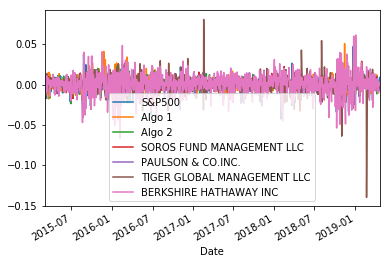

In [15]:
# Plot daily returns
joined_table.plot()

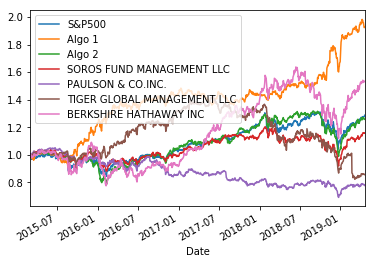

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + joined_table).cumprod(skipna=True)
cumulative_returns.sort_index(inplace=True, ascending=True)
cumulative_returns.dropna()
cumulative_returns.plot()

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [17]:
# Returns by Year


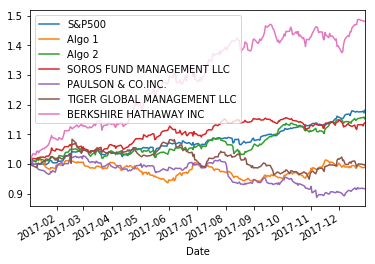

In [18]:
# Top Portfolio returns for 2017
performance_2017 = cumulative_returns[cumulative_returns.index.year == 2017]
daily_returns_2017 = performance_2017.pct_change()
cumulative_returns_2017 = (1 + daily_returns_2017).cumprod(skipna=True)
cumulative_returns_2017.sort_index(inplace=True, ascending=True)
cumulative_returns_2017.dropna()
cumulative_returns_2017.plot()

In [19]:
# Returns by Month
last_of_month_ret = cumulative_returns.groupby(
    [cumulative_returns.index.year, cumulative_returns.index.month]
).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.dropna().head()

S&P500    Algo 1    Algo 2  SOROS FUND MANAGEMENT LLC  \
Year Month                                                            
2015 4      0.022902 -0.007167  0.009620                   0.003248   
     5      0.000861  0.009439  0.000920                   0.008094   
     6     -0.017341 -0.003230 -0.009999                  -0.020352   
     7      0.008795 -0.051560 -0.016582                  -0.014779   
     8     -0.094023  0.035258 -0.014425                  -0.025728   

            PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Year Month                                                    
2015 4                0.016876                     0.010373   
     5                0.019797                    -0.001410   
     6               -0.011427                    -0.023138   
     7               -0.018293                     0.020172   
     8               -0.028777                    -0.034749   

            BERKSHIRE HATHAWAY INC  
Year Month                          
2015 4                    0.011927  
     5                    0.001002  
     6                   -0.020195  
     7                   -0.021668  
     8                   -0.056955

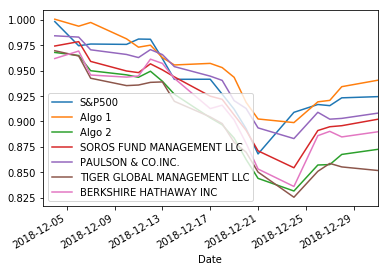

In [20]:
# Top Portfolio Returns for December 2018
performance_2018 = cumulative_returns[cumulative_returns.index.year == 2018]
december_2018_performance = performance_2018[performance_2018.index.month == 12]
december_returns_2018 = december_2018_performance.pct_change()
cumulative_returns_2018 = (1 + december_returns_2018).cumprod(skipna=True)
cumulative_returns_2018.sort_index(inplace=True, ascending=True)
cumulative_returns_2018.dropna()
cumulative_returns_2018.plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

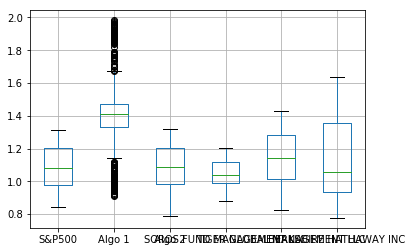

In [21]:
# Box plot to visually show risk
boxplot = cumulative_returns.boxplot(column=['S&P500', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])

In [22]:
# Daily Standard Deviations
returns_std = np.std(cumulative_returns)

print(returns_std)

S&P500                         0.122135
Algo 1                         0.231661
Algo 2                         0.131579
SOROS FUND MANAGEMENT LLC      0.073152
PAULSON & CO.INC.              0.088405
TIGER GLOBAL MANAGEMENT LLC    0.149581
BERKSHIRE HATHAWAY INC         0.241266
dtype: float64


In [23]:
#Portfolio sorted by Highest to Lowest Risk
returns_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.241266
Algo 1                         0.231661
TIGER GLOBAL MANAGEMENT LLC    0.149581
Algo 2                         0.131579
S&P500                         0.122135
PAULSON & CO.INC.              0.088405
SOROS FUND MANAGEMENT LLC      0.073152
dtype: float64

In [24]:
#Portfolios riskier than S&P500 (0.122135)
# 1. BERKSHIRE HATHAWAY INC         0.241266
# 2. Algo 1                         0.231661
# 3. TIGER GLOBAL MANAGEMENT LLC    0.149581
# 4. Algo 2                         0.131579

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = joined_table.std() * np.sqrt(252)
annualized_volatility.sort_values(inplace=True)
annualized_volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500                         0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

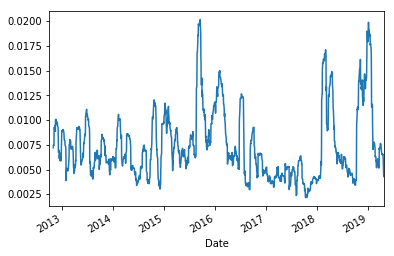

In [26]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window

sp_daily_returns.rolling(window=21).std().plot()

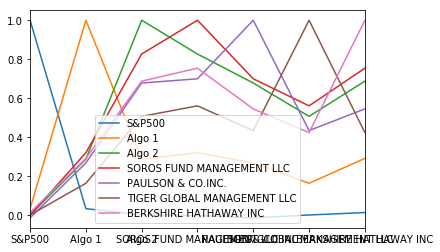

In [27]:
# Correlation
correlation = joined_table.corr()
correlation.plot()

In [50]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
berkshire_covariance = joined_table['BERKSHIRE HATHAWAY INC'].cov(joined_table['S&P500'])
variance = joined_table['S&P500'].var()
berkshire_beta = berkshire_covariance / variance
berkshire_beta

0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [29]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [30]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [31]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock
# YOUR CODE HERE

In [33]:
# Read the second stock
# YOUR CODE HERE

In [34]:
# Read the third stock
# YOUR CODE HERE

In [35]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [36]:
# Reset the index
# YOUR CODE HERE

In [37]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

In [38]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# YOUR CODE HERE

In [41]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [42]:
# Risk
# YOUR CODE HERE

In [43]:
# Rolling
# YOUR CODE HERE

In [44]:
# Beta
# YOUR CODE HERE

In [45]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [46]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [47]:
# YOUR CODE HERE